![](http://res.cloudinary.com/dgzgmhbah/image/upload/v1535989910/modemly-forum-posts/iris-machinelearning_otj9an.png)

**Hi Kagglers,
**

**Welcome to My Second Project. If there are any feedbacks/suggestions you would like to see in the Kernel please let me know. This notebook will always be a work in progress. Please leave any comments about further improvements to the notebook. I appreciate every note!
**

### If you like it , you can upvote and/or leave a comment :)



**Import Libraries and the Database **

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
from math import pi

#Data Visualization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Import necessary modules
from scipy.stats import randint

#Selection the Model 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

#Selection the Regulation 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Model Selection 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#Pipeline
from sklearn.pipeline import Pipeline,make_pipeline

#Data Preprocessing 
from sklearn.preprocessing import StandardScaler,scale,Imputer

#Metrics “ Measure Model Performance” 
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import roc_curve ,roc_auc_score

# Input data files are available in the "../input/" directory.
import os
print(os.listdir("../input"))



['database.sqlite', 'Iris.csv']


In [2]:
iris = pd.read_csv("../input/Iris.csv") #load the dataset

**Explore the Database **

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
iris.shape

(150, 6)

In [5]:
iris.describe() #to know statistical data and the features scale 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Visual Exploration for the Database **

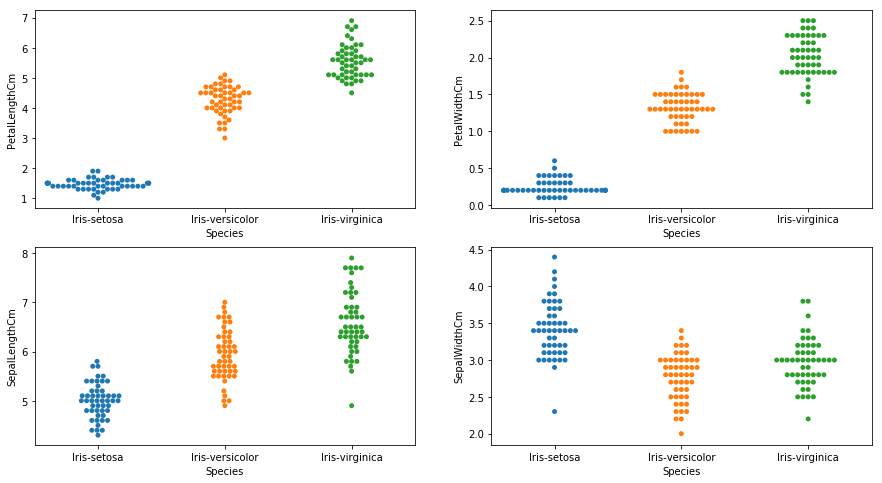

In [7]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.swarmplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.swarmplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.swarmplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.swarmplot(x='Species',y='SepalWidthCm',data=iris)
sns.set(style="whitegrid", palette="muted")


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


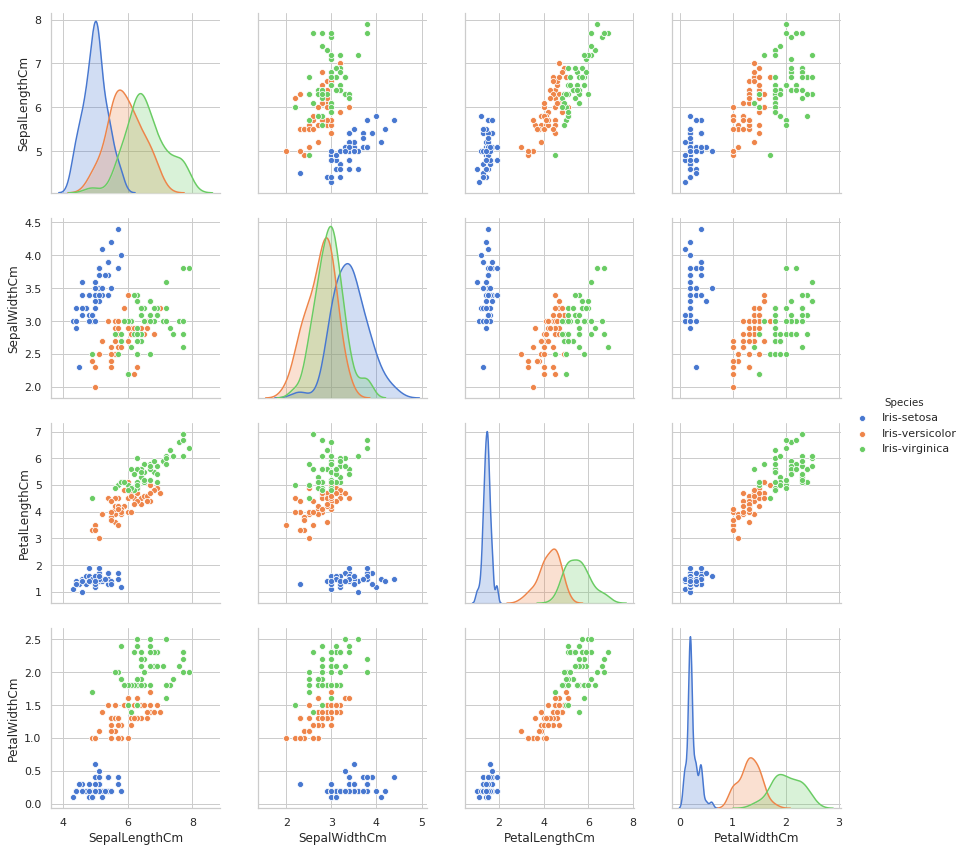

In [8]:
# The diagonal elements in a pairplot show the histogram by default,but we update it to "kde"
# kde: which creates and visualizes a kernel density estimate of the underlying feature
iris = iris.drop("Id", axis=1)
sns.pairplot(iris, hue="Species", size=3, diag_kind="kde")
plt.show()

**Notes that: There is correlation between the correlation between Petal Width and Length was very high.on the other hand, the Sepal Width and Length was very low.We can aprove that with heatmap.
**

**** This is very important notes because if there are features are highly correlated, the training data gives a much better accuracy.
**



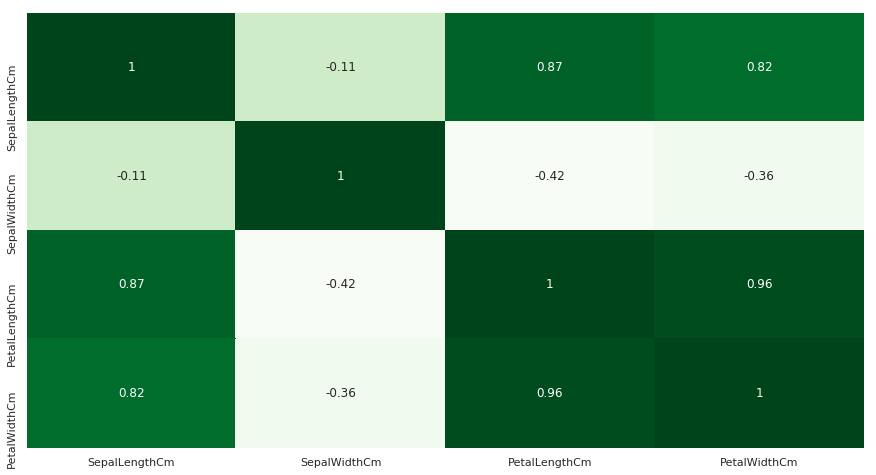

In [9]:
plt.figure(figsize=(15,8)) 
sns.heatmap(iris.corr(),annot=True,cmap='Greens',cbar=False) #The correlation matrix
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels

# Let's play with different algorithm

# Supervised Learning

**We need to clear note:**
**X = The attributes are the petal and sepal length and width. It is also known as Features**
**y = Target variables Species**


In [10]:
X=iris.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #attributes
y = iris.loc[:,'Species'] #Target Variables


**K-Nearest Neighbours (Hyperparameter Tuning With Grid SearchCV )**

In [11]:
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
knn_cv = GridSearchCV(knn, param_grid, cv=5) #Hyperparameter tuning using GridSearchCV 
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
print(knn_cv.best_params_)
print("KNN_CV Score:",knn_cv.score(X_test, y_test))
#or you can use Accuracy score 
print('The accuracy of the K-Nearest Neighbours is',accuracy_score(y_test, y_pred))


{'n_neighbors': 4}
KNN_CV Score: 0.9666666666666667
The accuracy of the K-Nearest Neighbours is 0.9666666666666667


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**K-Nearest Neighbours (Campare Accuracy between Sepal and Petal)**

**** To Prove that : If there are features are highly correlated, the training data gives a much better accuracy.**

In [12]:
#KNN For Spal 
X_spal = iris.loc[:,['SepalLengthCm','SepalWidthCm']]
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_spal, y, test_size=0.2, random_state=21)
knn_cv_spal = GridSearchCV(knn, param_grid, cv=5) #Hyperparameter tuning using GridSearchCV 
knn_cv_spal.fit(X_train, y_train)
y_pred = knn_cv_spal.predict(X_test)
print("Spal")
print(knn_cv_spal.best_params_)
print("KNN_CV_spal Score:",knn_cv_spal.score(X_test, y_test))
#or you can use Accuracy score 
print('The accuracy of the KNN For Spal is',accuracy_score(y_test, y_pred))


#KNN For Patal 
X_patal = iris.loc[:,['PetalLengthCm','PetalWidthCm']]
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_patal, y, test_size=0.2, random_state=21)
knn_cv_patal = GridSearchCV(knn, param_grid, cv=5) #Hyperparameter tuning using GridSearchCV 
knn_cv_patal.fit(X_train, y_train)
y_pred_patal= knn_cv_patal.predict(X_test)
print("____________________________")
print("patal")
print(knn_cv_patal.best_params_)
print("KNN_CV_patal Score:",knn_cv_patal.score(X_test, y_test))
#or you can use Accuracy score 
print('The accuracy of the KNN for Patal is',accuracy_score(y_test, y_pred))



/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Spal
{'n_neighbors': 15}
KNN_CV_spal Score: 0.7333333333333333
The accuracy of the KNN For Spal is 0.7333333333333333
____________________________
patal
{'n_neighbors': 41}
KNN_CV_patal Score: 0.9
The accuracy of the KNN for Patal is 0.7333333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Logistic Regression
**

In [13]:
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
logreg=LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

# Confusion matrix and Classification Report in scikit-learn
print('Confusuin_Martix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n ',classification_report(y_test,y_pred))
print('The accuracy of the Logistic Regression is',accuracy_score(y_test, y_pred))


Confusuin_Martix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

The accuracy of the Logistic Regression is 1.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# UnSupervised learning

**Assume: The data given aren't labelled, which means only the input variables(X) are given with no corresponding output variables to make the algorithms discover interesting structures in the data without a specific prediction task in mind. **


**KMeans Cluster**

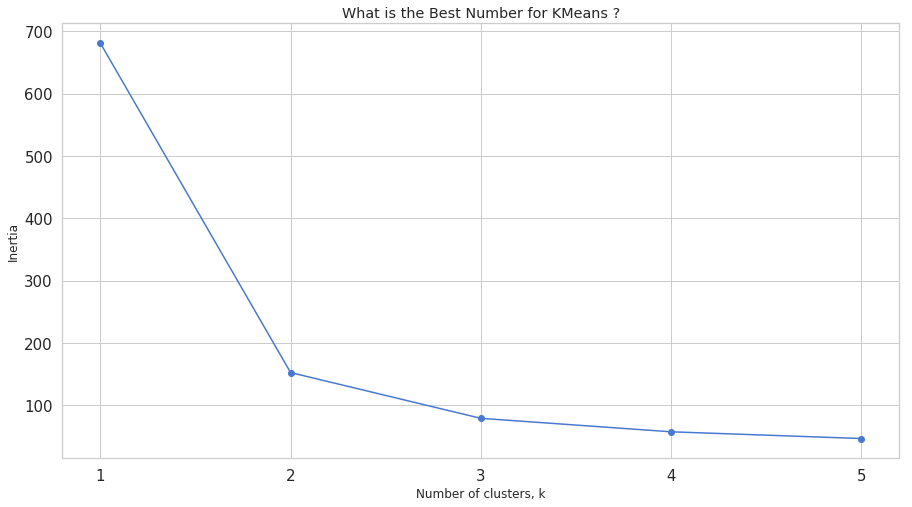

In [14]:
samples = iris.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #attributes

#First : Get the Best KMeans 
ks = range(1,6)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k)
    kc.fit(samples)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

#We choose an "elbow" in the inertia plot Where inertia begins to decrease more slowly
#From the curve the best number of KMeans =  3 Clusters


**Evaluating a clustering by Cross Tabulation **

In [15]:
#Second: The best number of KMeans =  3 Clusters
kc = KMeans(n_clusters=3)
kc.fit(samples)
labels = kc.predict(samples)
print(kc.inertia_)

#Thrid: Evaluating a clustering by Cross Tabulation 
df = pd.DataFrame({'labels': labels, 'species': iris.Species})
ct = pd.crosstab(df['labels'],df['species'])

print(ct)

78.94084142614602
species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0                2              36
1                 50                0               0
2                  0               48              14
